In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print(cancer.data)
d = cancer.data
t = cancer.target
print(d.shape)

cancer.keys(): 
dict_keys(['data', 'DESCR', 'feature_names', 'target', 'target_names'])
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


In [2]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
print(knn)
knn.fit(d, t)
knn.predict([[3, 5, 4, 2, 5 ,3, 5, 4, 2, 5,3, 5, 4, 2, 5, 3, 5, 4, 2, 5 ,3, 5, 4, 2, 5,3, 5, 4, 2, 5]])
d_new = [[3, 5, 4, 2, 5 ,3, 5, 4, 2, 5,3, 5, 4, 2, 5, 3, 5, 4, 2, 5 ,3, 5, 4, 2, 5,3, 5, 4, 2, 5], [1, 2, 3, 4, 5 ,6,1, 2, 3, 4, 5 ,6,1, 2, 3, 4, 5 ,6,1, 2, 3, 4, 5 ,6,1, 2, 3, 4, 5 ,6]]
knn.predict(d_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


array([1, 1])

In [3]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(d, t)
knn.predict(d_new)

array([1, 1])

In [4]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(d, t)
logreg.predict(d_new)

array([0, 0])

In [5]:
logreg = LogisticRegression()
logreg.fit(d, t)
logreg.predict(d)
t_pred = logreg.predict(d)
len(t_pred)

569

In [6]:
from sklearn import metrics
print(metrics.accuracy_score(t, t_pred))

0.9595782073813708


In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(d, t)
y_pred = knn.predict(d)
print(metrics.accuracy_score(t, t_pred))

0.9595782073813708


In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(d, t)
t_pred = knn.predict(d)
print(metrics.accuracy_score(t, t_pred))

0.9472759226713533


In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(d, t)
t_pred = knn.predict(d)
print(metrics.accuracy_score(t, t_pred))

1.0


In [10]:
from sklearn.model_selection import train_test_split
d_train, d_test, t_train, t_test = train_test_split(d, t, test_size=0.4, random_state=30)

In [11]:
print(d_train.shape)
print(d_test.shape)

(341, 30)
(228, 30)


In [12]:
print(d.shape)
print(t.shape)

(569, 30)
(569,)


In [13]:
print(d_train.shape)
print(d_test.shape)

(341, 30)
(228, 30)


In [14]:
print(t_train.shape)
print(t_test.shape)

(341,)
(228,)


In [15]:
logreg = LogisticRegression()
logreg.fit(d_train, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
t_pred = logreg.predict(d_test)

In [17]:
print(metrics.accuracy_score(t_test, t_pred))

0.9342105263157895


In [18]:
t_pred = logreg.predict(d_test)
print(metrics.accuracy_score(t_test, t_pred))

0.9342105263157895


In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(d_train, t_train)
t_pred = knn.predict(d_test)
print(metrics.accuracy_score(t_test, t_pred))

0.9254385964912281


In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(d_train, t_train)
t_pred = knn.predict(d_test)
print(metrics.accuracy_score(t_test, t_pred))

0.9342105263157895


In [21]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(d_train, t_train)
    t_pred = knn.predict(d_test)
    scores.append(metrics.accuracy_score(t_test, t_pred))

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


AttributeError: module 'matplotlib.pyplot' has no attribute 'dlabel'

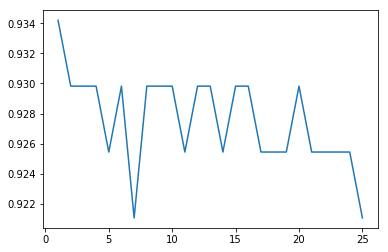

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range, scores)
plt.dlabel('Valor de k para KNN')
plt.tlabel('Teste de Acuracia')

In [23]:
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

AttributeError: module 'matplotlib.pyplot' has no attribute 'dlabel'

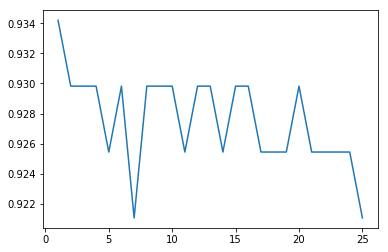

In [24]:
plt.plot(k_range, scores)
plt.dlabel('Valor de k para KNN')
plt.tlabel('Teste de Acuracia')

In [25]:
git clone https://github.com/ffonseca/gestconhecimentosemana10
.git

SyntaxError: invalid syntax (<ipython-input-25-7584f35efcce>, line 1)